In [2]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import read_csv


In [6]:
AllPerformace = pd.read_csv('Q4performance.csv')

In [7]:

AllPerformace

,Unnamed: 0,Accuracy,Sensitivity,Specificity,AUC-ROC,MCC,Precision,F1 Score
0,Baseline (0 to 5000),0.728665,0.709784,0.903934,0.847504,0.620677,0.747941,0.716909
1,with FE (0 to 5000),0.817128,0.789839,0.951488,0.898436,0.748363,0.852196,0.806802
2,Baseline (5001 to 10000),0.775785,0.690077,0.848081,0.831168,0.580712,0.728587,0.693351
3,with FE (5001 to 10000),0.821922,0.751443,0.850702,0.857340,0.648190,0.785345,0.752353
4,Baseline (above 10000),0.733565,0.771398,0.789353,0.816587,0.568703,0.744286,0.739795
5,with FE (above 10000),0.910677,0.929884,0.916374,0.932843,0.853375,0.909756,0.915487


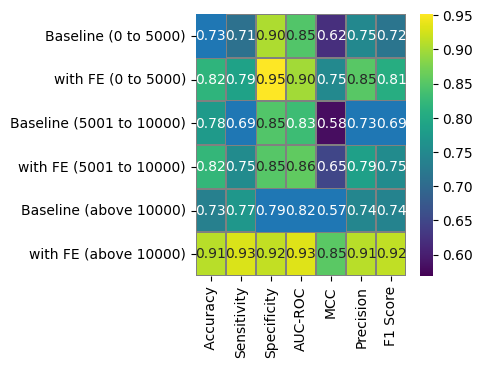

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 3.4,3.4
omics = AllPerformace.iloc[:,0]
perf = AllPerformace.iloc[:,1:11]
# Create a heatmap
ax = sns.heatmap(perf, 
            xticklabels=perf.columns, #vmax= 1, vmin= 0,
            yticklabels= omics,
            cmap='viridis',#cmap='viridis',
            linewidth= 0.2,
            linecolor='gray',
            annot=True,
            fmt=".2f",
            annot_kws={"size": 10}
           )

# Find the indices of the highest values in each column
highest_values_indices = perf.idxmin().tolist()

# Annotate the highest values with red rectangles around them
for i, col in enumerate(perf.columns):
    row_idx = highest_values_indices[i]
    ax.add_patch(plt.Rectangle((i, row_idx), 1, 1, fill= 'blue', lw=2))

plt.savefig('Q4resources.png',dpi=300,bbox_inches = 'tight')
plt.show()

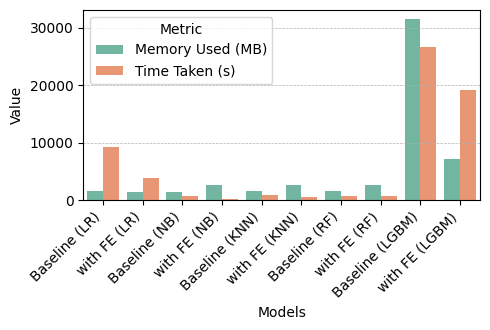

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Method': [
        "Baseline (LR)", "with FE (LR)",
        "Baseline (NB)", "with FE (NB)",
        "Baseline (KNN)", "with FE (KNN)",
        "Baseline (RF)", "with FE (RF)",
        "Baseline (LGBM)", "with FE (LGBM)"
    ],
    'Memory Used (MB)': [
        1526.022949, 1453.422689,
        1484.729492, 2607.120117,
        1491.828613, 2609.286458,
        1491.67334, 2642.910319,
        31495.30322, 7192.487467
    ],
    'Time Taken (s)': [
        9182.890263, 3821.542858,
        620.0313447, 195.9556208,
        915.8700592, 446.759574,
        753.8747108, 632.1247457,
        26636.71388, 19076.61891
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame
df_melted = df.melt(id_vars='Method', value_vars=['Memory Used (MB)', 'Time Taken (s)'], var_name='Metric', value_name='Value')

# Plotting
fig, ax = plt.subplots(figsize=(5, 3.4))

# Colors
colors = sns.color_palette("Set2", 2)

# Plotting
sns.barplot(x='Method', y='Value', hue='Metric', data=df_melted, palette=colors, ax=ax)
ax.set_xlabel('Models')
ax.set_ylabel('Value')
ax.set_xticklabels(df['Method'], rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', linewidth=0.5)

# Adding legend
ax.legend(title='Metric')

# Title and layout
plt.title('')
fig.tight_layout()
plt.show()


In [5]:
AllPerformace.set_index('Omic', inplace=True)
AllPerformace


,Accuracy,AUC-ROC,Precision,Recall,F1,MCC
Omic,,,,,,
cnv,0.759788,0.500000,0.511973,0.517857,0.480496,0.064848
snv,0.763757,0.500000,0.504118,0.519048,0.479447,0.061472
meth,0.893783,0.642857,0.882459,0.809632,0.827048,0.681841
mRNA,0.836508,0.750000,0.841322,0.694264,0.718335,0.503063
miRNA,0.771164,0.500000,0.486152,0.513095,0.461598,0.058912
...,...,...,...,...,...,...
cnv_snv_meth_miRNA_rppa,0.919312,0.726190,0.927104,0.847619,0.871641,0.766237
cnv_snv_mRNA_miRNA_rppa,0.814418,0.750000,0.798278,0.646429,0.665346,0.408945
cnv_meth_mRNA_miRNA_rppa,0.861905,0.666667,0.916229,0.710714,0.742439,0.579793


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Step 2: Perform min-max scaling on all values in the dataframe
scaler = MinMaxScaler()
performance_scaled = pd.DataFrame(scaler.fit_transform(AllPerformace), columns= AllPerformace.columns)
## define scoring function based on addictive model
def scoreModel(acc, auc, prc,recall, f1, mcc):

    score =  acc + auc + prc + recall + f1 + mcc

    return score
# Apply the calculate_score function to each row
performance_scaled['score'] = performance_scaled.apply(lambda row: scoreModel(*row[0:8]), axis=1)
performance_scaled.set_index(AllPerformace.index, inplace=True)

In [7]:
performance_scaled = performance_scaled.sort_values(by='score', ascending=False)


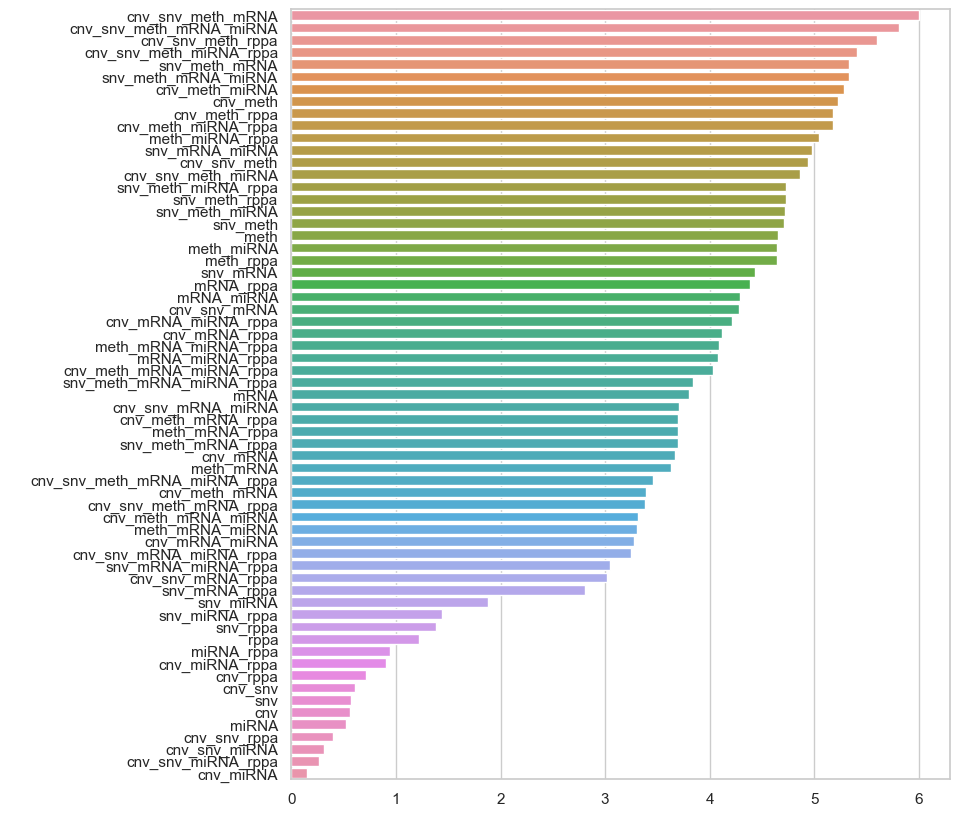

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use Seaborn to create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8.5, 10))  # Adjust the figure size as needed

# Use the barplot function from Seaborn
ax = sns.barplot(x= performance_scaled['score'], y= performance_scaled.index)

# Customize the chart
plt.xlabel(' ')
plt.ylabel(' ')
plt.savefig('Figure 13.png',dpi=300,bbox_inches = 'tight')

# Show the plot
plt.show()


In [9]:
performance_scaled.to_csv('63OmicsBinarySVMRank.csv')